# TP de Aprendizagem de Máquina
### Aluno: Geanderson Esteves dos Santos

Trabalho Prático 1
- Redes Neuronais + Backpropagation

Neste trabalho você irá implementar uma rede neuronal com três camadas:

1. Camada de entrada: cada unidade representa uma dimensão do dado de entrada.

2. Camada oculta: cada unidade representa uma transformação a partir das unidades de entrada.

3. Camada de saída: cada unidade representa a chance da saída correspondente ser a correta.

Você irá utilizar a função Sigmóide para obter não-linearidade. Além disso, a função de perda a ser minimizada é a seguinte:

onde m é a quantidade de entradas no treino, K é o número de saídas possíveis,  representa a saída correta de cada classe k em cada entrada (i), e similarmente representa a saída dada pela rede neuronal.

O dado a ser utilizado está anexado. Trata-se de 5000 entradas, onde cada entrada refere-se a um dígito escrito manualmente (i.e., MNIST dataset). Dessa forma, m=5000 e K=10. Cada entrada é dada por uma matriz de dimensões 28 por 28, ou seja, um vetor de 784 dimensões. A primeira coluna do arquivo sempre é o rótulo do dígito correto.

A rede neuronal a ser implementada deverá ter 784 unidades de entrada e 10 unidades de saída. Em seus experimentos, você deverá variar o número de unidades na camada oculta (25, 50, 100).

Além disso, você deverá comparar os seguintes algoritmos de cálculo de gradiente:

1. Gradient Descent: o gradiente é calculado após cada época (após as 5000 entradas serem processadas).

2. Stochastic Gradient Descent: o gradiente é calculado após cada entrada.

3. Mini-Batch: o gradiente é calculado após um certo número de entradas (considere 10 e 50).

Por fim, você também deverá variar a taxa de aprendizado: 0.5, 1, 10.

O documento a ser entregue deverá apresentar o resultado de seus experimentos. Ou seja, deverá apresentar discussão da variação do número de unidades na camada oculta para cada um dos três algoritmos de cálculo de gradiente. Você deverá apresentar gráficos mostrando a convergência do erro empírico para cada situação (unidades na camada oculta, algoritmo de cálculo do gradiente, taxa de aprendizado). Você deverá deixar claras todas as hipóteses que julgar serem pertinentes.

In [1]:
# Required packages.
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


In [2]:
# Fix random seed for reproducibility.
seed = 7
np.random.seed(seed)

In [3]:
# Load data.
dataset = np.loadtxt("data_tp1", delimiter=",")
X_train = dataset[:, 1:].reshape(dataset.shape[0],1,28, 28).astype('float32')
y_train = dataset[:,0]
X_test = dataset[:,1:].reshape(dataset.shape[0],1, 28, 28).astype('float32')
y_test = dataset[:,0]

In [4]:
# An image is represented by 28*28 then it is a 784 in memory.
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# Normalize inputs from 0-255 to 0-1.
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
# Define model
def baseline_model(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(unity, input_dim=unity, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Set the gradient
    sgd = optimizers.SGD(lr=learning_rate)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [8]:
# Build the model.
#unity = 50
#learning_rate = 0.5
#model = baseline_model(unity, learning_rate)
# Fit the model
# default batch size was 200
#model.fit(X_train, y_train, validation_data=(X_test, y_test))
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
# Final evaluation of the model
#scores = model.evaluate(X_test, y_test, verbose=2)
#print("Training Error: %.2f%%" % (100-scores[1]*100))

# Testes variando Gradient Descent (GD), Sthocastic Gradient Descent (SGD) e Mini-Batch
### Para efeito de comparação e seguindo as intruções do TP mostradas no primeiro item deste notebook.
##### 1 - Testar o learning rate (0.5, 1, 10) para os 3 gradientes (GD, SGD e Mini-Batch) variando o número de unidades da hidden layer (25, 50, 100). 
##### 2 - Realizar testes complementares variando parâmetros não previstos no enunciado do TP. 

In [9]:
# Set up the arrays with the inputs and outputs of the tests. 
inputsGD = []
inputsGD.append([])
inputsGD.append([])
inputsGD.append([])
inputsGD.append([])
outputsGD = []
outputsGD.append([])
outputsGD.append([])
outputsGD.append([])
outputsGD.append([])

In [10]:
inputsSGD = []
inputsSGD.append([])
inputsSGD.append([])
inputsSGD.append([])
inputsSGD.append([])
outputsSGD = []
outputsSGD.append([])
outputsSGD.append([])
outputsSGD.append([])
outputsSGD.append([])

In [11]:
inputsMiniBatch10 = []
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
outputsMiniBatch10 = []
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])

In [12]:
inputsMiniBatch50 = []
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
outputsMiniBatch50 = []
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])

In [13]:
# Use the model by parameters.
def use_model(learning_rate, unity, gradient, index, x_axis):
    lr = learning_rate
    un = unity
    
    if x_axis == 'lr':
        var = learning_rate
    else:
        var = unity
    
    if gradient == 'gd':
        inputsGD[index].append(var)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=5000, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsGD[index].append(100-scores[1]*100)
    elif gradient == 'sgd':
        inputsSGD[index].append(var)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsSGD[index].append(100-scores[1]*100)
    elif gradient == 'mb10':
        inputsMiniBatch10[index].append(var)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsMiniBatch10[index].append(100-scores[1]*100)
    elif gradient == 'mb50':
        inputsMiniBatch50[index].append(var)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=50, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsMiniBatch50[index].append(100-scores[1]*100)

In [14]:
# Use the model by parameters.
def use_model2(lr, un, gradient, index, x_axis):
    
    for l, u in zip(lr, un):
        if x_axis == 'lr':
            x = l
        else:
            x = u
        
        if gradient == 'gd':
            inputsGD[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=5000, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsGD[index].append(100-scores[1]*100)
        elif gradient == 'sgd':
            inputsSGD[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsSGD[index].append(100-scores[1]*100)
        elif gradient == 'mb10':
            inputsMiniBatch10[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsMiniBatch10[index].append(100-scores[1]*100)
        elif gradient == 'mb50':
            inputsMiniBatch50[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=50, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsMiniBatch50[index].append(100-scores[1]*100)

In [15]:
# GD.
use_model2([0.5, 1, 10], [25, 25, 25], 'gd', 0, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 197us/step - loss: 2.3074 - acc: 0.0932 - val_loss: 2.3034 - val_acc: 0.0922
Epoch 2/10
5000/5000 [==============================] - 1s 146us/step - loss: 2.3034 - acc: 0.0922 - val_loss: 2.3013 - val_acc: 0.0984
Epoch 3/10
5000/5000 [==============================] - 1s 125us/step - loss: 2.3013 - acc: 0.0984 - val_loss: 2.3001 - val_acc: 0.1164
Epoch 4/10
5000/5000 [==============================] - 1s 144us/step - loss: 2.3001 - acc: 0.1164 - val_loss: 2.2992 - val_acc: 0.1142
Epoch 5/10
5000/5000 [==============================] - 1s 139us/step - loss: 2.2992 - acc: 0.1142 - val_loss: 2.2985 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 1s 130us/step - loss: 2.2985 - acc: 0.1142 - val_loss: 2.2978 - val_acc: 0.1142
Epoch 7/10
5000/5000 [==============================] - 1s 142us/step - loss: 2.2978 - acc: 0.1142 - val_loss: 2.2972 - val_acc: 0.1142


In [16]:
# SGD.
use_model2([0.5, 1, 10], [25, 25, 25], 'sgd', 0, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 54s 11ms/step - loss: 3.8519 - acc: 0.1058 - val_loss: 6.1984 - val_acc: 0.0912
Epoch 2/10
5000/5000 [==============================] - 52s 10ms/step - loss: 5.9277 - acc: 0.0968 - val_loss: 5.9208 - val_acc: 0.1000
Epoch 3/10
5000/5000 [==============================] - 52s 10ms/step - loss: 6.5570 - acc: 0.1036 - val_loss: 6.1068 - val_acc: 0.1060
Epoch 4/10
5000/5000 [==============================] - 52s 10ms/step - loss: 5.7566 - acc: 0.1038 - val_loss: 4.7547 - val_acc: 0.0912
Epoch 5/10
5000/5000 [==============================] - 55s 11ms/step - loss: 4.5766 - acc: 0.1032 - val_loss: 4.4114 - val_acc: 0.1040
Epoch 6/10
5000/5000 [==============================] - 53s 11ms/step - loss: 4.5567 - acc: 0.1010 - val_loss: 4.6339 - val_acc: 0.1142
Epoch 7/10
5000/5000 [==============================] - 54s 11ms/step - loss: 4.5699 - acc: 0.0988 - val_loss: 4.2193 - val_acc: 0.1040


In [17]:
# MB10.
use_model2([0.5, 1, 10], [25, 25, 25], 'mb10', 0, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 12s 2ms/step - loss: 1.5875 - acc: 0.4146 - val_loss: 0.8742 - val_acc: 0.6968
Epoch 2/10
5000/5000 [==============================] - 11s 2ms/step - loss: 0.6664 - acc: 0.7700 - val_loss: 0.4679 - val_acc: 0.8600
Epoch 3/10
5000/5000 [==============================] - 11s 2ms/step - loss: 0.4911 - acc: 0.8428 - val_loss: 0.4583 - val_acc: 0.8630
Epoch 4/10
5000/5000 [==============================] - 11s 2ms/step - loss: 0.4060 - acc: 0.8762 - val_loss: 0.3343 - val_acc: 0.8876
Epoch 5/10
5000/5000 [==============================] - 11s 2ms/step - loss: 0.3355 - acc: 0.8954 - val_loss: 0.4116 - val_acc: 0.8692
Epoch 6/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.2925 - acc: 0.9118 - val_loss: 0.2530 - val_acc: 0.9186
Epoch 7/10
5000/5000 [==============================] - 11s 2ms/step - loss: 0.2519 - acc: 0.9212 - val_loss: 0.2124 - val_acc: 0.9364
Epoch 8/

In [18]:
# MB50.
use_model2([0.5, 1, 10], [25, 25, 25], 'mb50', 0, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 7s 1ms/step - loss: 2.2204 - acc: 0.1830 - val_loss: 1.9385 - val_acc: 0.3136
Epoch 2/10
5000/5000 [==============================] - 3s 548us/step - loss: 1.5241 - acc: 0.4652 - val_loss: 1.0198 - val_acc: 0.6670
Epoch 3/10
5000/5000 [==============================] - 2s 422us/step - loss: 0.8959 - acc: 0.7010 - val_loss: 0.6625 - val_acc: 0.8032
Epoch 4/10
5000/5000 [==============================] - 3s 595us/step - loss: 0.6445 - acc: 0.7964 - val_loss: 0.5905 - val_acc: 0.8144
Epoch 5/10
5000/5000 [==============================] - 3s 628us/step - loss: 0.5327 - acc: 0.8390 - val_loss: 0.5605 - val_acc: 0.8272
Epoch 6/10
5000/5000 [==============================] - 3s 648us/step - loss: 0.4648 - acc: 0.8558 - val_loss: 0.4269 - val_acc: 0.8790
Epoch 7/10
5000/5000 [==============================] - 3s 640us/step - loss: 0.4165 - acc: 0.8744 - val_loss: 0.4246 - val_acc: 0.8654
Ep

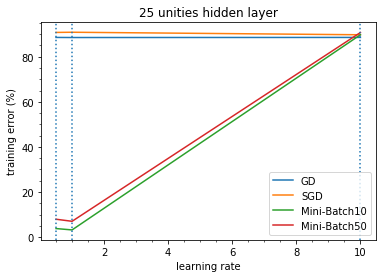

In [19]:
index = 0

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("25 unities hidden layer")
plt.legend()
plt.show()

In [20]:
# GD, lr = 0.5, un = 25.
#use_model(0.5, 25, 'gd', 0, 'lr')

In [21]:
# GD, lr = 1, un = 25.
#use_model(1, 25, 'gd', 0, 'lr')

In [22]:
# GD, lr = 10, un = 25.
#use_model(10, 25, 'gd', 0, 'lr')

In [23]:
# SGD, lr = 0.5, un = 25.
#use_model(0.5, 25, 'sgd', 0, 'lr')

In [24]:
# SGD, lr = 1, un = 25.
#use_model(1, 25, 'sgd', 0, 'lr')

In [25]:
# SGD, lr = 10, un = 25.
#use_model(10, 25, 'sgd', 0, 'lr')

In [26]:
# MB10, lr = 0.5, un = 25.
#use_model(0.5, 25, 'mb10', 0, 'lr')

In [27]:
# MB10, lr = 1, un = 25.
#use_model(1, 25, 'mb10', 0, 'lr')

In [28]:
# MB10, lr = 10, un = 25
#use_model(10, 25, 'mb10', 0, 'lr')

In [29]:
# MB50, lr = 0.5, un = 25.
#use_model(0.5, 25, 'mb50', 0, 'lr')

In [30]:
# MB50, lr = 1, un = 25.
#use_model(1, 25, 'mb50', 0, 'lr')

In [31]:
# MB50, lr = 10, un = 25.
#use_model(10, 25, 'mb50', 0, 'lr')

In [32]:
# GD, lr = 0.5, un = 50.
#use_model(0.5, 50, 'gd', 1, 'lr')

In [33]:
# GD.
use_model2([0.5, 1, 10], [50, 50, 50], 'gd', 1, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 244us/step - loss: 2.3046 - acc: 0.1024 - val_loss: 2.3006 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 1s 118us/step - loss: 2.3006 - acc: 0.1142 - val_loss: 2.2994 - val_acc: 0.1142
Epoch 3/10
5000/5000 [==============================] - 1s 104us/step - loss: 2.2994 - acc: 0.1142 - val_loss: 2.2984 - val_acc: 0.1142
Epoch 4/10
5000/5000 [==============================] - 1s 113us/step - loss: 2.2984 - acc: 0.1142 - val_loss: 2.2974 - val_acc: 0.1142
Epoch 5/10
5000/5000 [==============================] - 1s 107us/step - loss: 2.2974 - acc: 0.1142 - val_loss: 2.2963 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 1s 109us/step - loss: 2.2963 - acc: 0.1142 - val_loss: 2.2953 - val_acc: 0.1142
Epoch 7/10
5000/5000 [==============================] - 1s 104us/step - loss: 2.2953 - acc: 0.1142 - val_loss: 2.2942 - val_acc: 0.1142


In [34]:
# SGD.
use_model2([0.5, 1, 10], [50, 50, 50], 'sgd', 1, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 57s 11ms/step - loss: 14.6284 - acc: 0.0922 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 2/10
5000/5000 [==============================] - 61s 12ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 3/10
5000/5000 [==============================] - 56s 11ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 4/10
5000/5000 [==============================] - 56s 11ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 5/10
5000/5000 [==============================] - 67s 13ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 6/10
5000/5000 [==============================] - 69s 14ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 7/10
5000/5000 [==============================] - 72s 14ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - va

In [35]:
# MB10.
use_model2([0.5, 1, 10], [50, 50, 50], 'mb10', 1, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 6s 1ms/step - loss: 1.5383 - acc: 0.4274 - val_loss: 0.6153 - val_acc: 0.8056
Epoch 2/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.5917 - acc: 0.8020 - val_loss: 0.4270 - val_acc: 0.8570
Epoch 3/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.4060 - acc: 0.8682 - val_loss: 0.3200 - val_acc: 0.8970
Epoch 4/10
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3180 - acc: 0.8980 - val_loss: 0.2329 - val_acc: 0.9288
Epoch 5/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2529 - acc: 0.9192 - val_loss: 0.1835 - val_acc: 0.9428
Epoch 6/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2045 - acc: 0.9346 - val_loss: 0.1464 - val_acc: 0.9528
Epoch 7/10
5000/5000 [==============================] - 10s 2ms/step - loss: 0.1644 - acc: 0.9492 - val_loss: 0.1302 - val_acc: 0.9602
Epoch 8/10
50

In [36]:
# MB50.
use_model2([0.5, 1, 10], [50, 50, 50], 'mb50', 1, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 5s 930us/step - loss: 2.2408 - acc: 0.1602 - val_loss: 2.0152 - val_acc: 0.2856
Epoch 2/10
5000/5000 [==============================] - 3s 582us/step - loss: 1.3504 - acc: 0.5210 - val_loss: 1.0561 - val_acc: 0.6480
Epoch 3/10
5000/5000 [==============================] - 3s 574us/step - loss: 0.8112 - acc: 0.7242 - val_loss: 0.6229 - val_acc: 0.8064
Epoch 4/10
5000/5000 [==============================] - 3s 570us/step - loss: 0.5985 - acc: 0.8038 - val_loss: 0.5257 - val_acc: 0.8426
Epoch 5/10
5000/5000 [==============================] - 3s 537us/step - loss: 0.5023 - acc: 0.8444 - val_loss: 0.4448 - val_acc: 0.8620
Epoch 6/10
5000/5000 [==============================] - 2s 498us/step - loss: 0.4388 - acc: 0.8584 - val_loss: 0.3756 - val_acc: 0.8804
Epoch 7/10
5000/5000 [==============================] - 3s 557us/step - loss: 0.3910 - acc: 0.8794 - val_loss: 0.3436 - val_acc: 0.8912


In [37]:
# GD, lr = 1, un = 50.
#use_model(1, 50, 'gd', 1, 'lr')

In [38]:
# GD, lr = 1, un = 50.
#use_model(10, 50, 'gd', 1, 'lr')

In [39]:
# SGD, lr = 0.5, un = 50.
#use_model(0.5, 50, 'sgd', 1, 'lr')

In [40]:
# SGD, lr = 1, un = 50.
#use_model(1, 50, 'sgd', 1, 'lr')

In [41]:
# SGD, lr = 10, un = 50.
#use_model(10, 50, 'sgd', 1, 'lr')

In [42]:
# MB10, lr = 0.5, un = 50.
#use_model(0.5, 50, 'mb10', 1, 'lr')

In [43]:
# MB10, lr = 1, un = 50.
#use_model(1, 50, 'mb10', 1, 'lr')

In [44]:
# MB10, lr = 10, un = 50.
#use_model(10, 50, 'mb10', 1, 'lr')

In [45]:
# MB50, lr = 0.5, un = 50.
#use_model(0.5, 50, 'mb50', 1, 'lr')

In [46]:
# MB50, lr = 1, un = 50.
#use_model(1, 50, 'mb50', 1, 'lr')

In [47]:
# MB50, lr = 10, un = 50.
#use_model(10, 50, 'mb50', 1, 'lr')

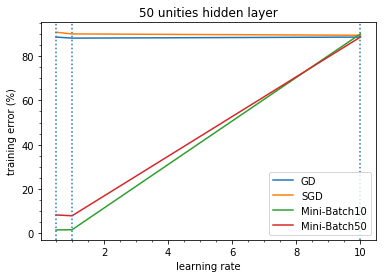

In [48]:
index = 1

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("50 unities hidden layer")
plt.legend()
plt.show()

In [49]:
# GD, lr = 0.5, un = 100.
#use_model(0.5, 100, 'gd', 2, 'lr')

In [50]:
# GD, lr = 1, un = 100.
#use_model(1, 100, 'gd', 2, 'lr')

In [51]:
# GD, lr = 1, un = 100.
#use_model(10, 100, 'gd', 2, 'lr')

In [52]:
# SGD, lr = 0.5, un = 100.
#use_model(0.5, 100, 'sgd', 2, 'lr')

In [53]:
# SGD, lr = 1, un = 100.
#use_model(1, 100, 'sgd', 2, 'lr')

In [54]:
# SGD, lr = 10, un = 100.
#use_model(10, 100, 'sgd', 2, 'lr')

In [55]:
# MB10, lr = 0.5, un = 100.
#use_model(0.5, 100, 'mb10', 2, 'lr')

In [56]:
# MB10, lr = 1, un = 100.
#use_model(1, 100, 'mb10', 2, 'lr')

In [57]:
# MB10, lr = 10, un = 100.
#use_model(10, 100, 'mb10', 2, 'lr')

In [58]:
# MB50, lr = 0.5, un = 100.
#use_model(0.5, 100, 'mb50', 2, 'lr')

In [59]:
# MB50, lr = 1, un = 100.
#use_model(1, 100, 'mb50', 2, 'lr')

In [60]:
# MB50, lr = 10, un = 100.
#use_model(10, 100, 'mb50', 2, 'lr')

In [61]:
# GD.
use_model2([0.5, 1, 10], [100, 100, 100], 'gd', 2, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 288us/step - loss: 2.3589 - acc: 0.1000 - val_loss: 2.3117 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 1s 112us/step - loss: 2.3117 - acc: 0.1142 - val_loss: 2.2982 - val_acc: 0.1252
Epoch 3/10
5000/5000 [==============================] - 1s 116us/step - loss: 2.2982 - acc: 0.1252 - val_loss: 2.2946 - val_acc: 0.1142
Epoch 4/10
5000/5000 [==============================] - 1s 107us/step - loss: 2.2946 - acc: 0.1142 - val_loss: 2.2920 - val_acc: 0.1806
Epoch 5/10
5000/5000 [==============================] - 1s 123us/step - loss: 2.2920 - acc: 0.1806 - val_loss: 2.2897 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 1s 155us/step - loss: 2.2897 - acc: 0.1142 - val_loss: 2.2874 - val_acc: 0.1316
Epoch 7/10
5000/5000 [==============================] - 1s 207us/step - loss: 2.2874 - acc: 0.1316 - val_loss: 2.2852 - val_acc: 0.1148


In [62]:
# SGD.
use_model2([0.5, 1, 10], [100, 100, 100], 'sgd', 2, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 54s 11ms/step - loss: 4.0483 - acc: 0.2382 - val_loss: 8.1843 - val_acc: 0.4098
Epoch 2/10
5000/5000 [==============================] - 49s 10ms/step - loss: 13.2346 - acc: 0.1652 - val_loss: 12.8136 - val_acc: 0.1620
Epoch 3/10
5000/5000 [==============================] - 42s 8ms/step - loss: 13.2946 - acc: 0.1612 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
5000/5000 [==============================] - 43s 9ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
5000/5000 [==============================] - 42s 8ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
5000/5000 [==============================] - 50s 10ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
5000/5000 [==============================] - 67s 13ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc

In [63]:
# MB10.
use_model2([0.5, 1, 10], [100, 100, 100], 'mb10', 2, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 7s 1ms/step - loss: 1.8836 - acc: 0.3156 - val_loss: 1.0545 - val_acc: 0.6054
Epoch 2/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.8570 - acc: 0.7030 - val_loss: 0.5641 - val_acc: 0.8206
Epoch 3/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.6194 - acc: 0.7960 - val_loss: 0.5165 - val_acc: 0.8344
Epoch 4/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.4965 - acc: 0.8396 - val_loss: 0.3926 - val_acc: 0.8800
Epoch 5/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.4925 - acc: 0.8478 - val_loss: 0.4980 - val_acc: 0.8360
Epoch 6/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.4901 - acc: 0.8520 - val_loss: 0.4034 - val_acc: 0.8750
Epoch 7/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.4213 - acc: 0.8718 - val_loss: 0.6673 - val_acc: 0.8030
Epoch 8/10
500

In [64]:
# MB50.
use_model2([0.5, 1, 10], [100, 100, 100], 'mb50', 2, 'lr')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 3s 597us/step - loss: 2.2729 - acc: 0.1954 - val_loss: 1.6492 - val_acc: 0.4854
Epoch 2/10
5000/5000 [==============================] - 2s 321us/step - loss: 1.1727 - acc: 0.5820 - val_loss: 0.9227 - val_acc: 0.6462
Epoch 3/10
5000/5000 [==============================] - 2s 321us/step - loss: 0.7418 - acc: 0.7498 - val_loss: 0.6558 - val_acc: 0.7958
Epoch 4/10
5000/5000 [==============================] - 2s 328us/step - loss: 0.5558 - acc: 0.8120 - val_loss: 0.4598 - val_acc: 0.8494
Epoch 5/10
5000/5000 [==============================] - 2s 312us/step - loss: 0.4804 - acc: 0.8452 - val_loss: 0.4014 - val_acc: 0.8714
Epoch 6/10
5000/5000 [==============================] - 2s 316us/step - loss: 0.4324 - acc: 0.8622 - val_loss: 0.3912 - val_acc: 0.8792
Epoch 7/10
5000/5000 [==============================] - 2s 347us/step - loss: 0.3783 - acc: 0.8796 - val_loss: 0.3181 - val_acc: 0.9002


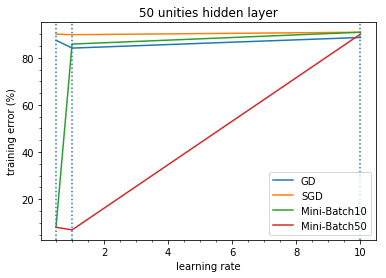

In [65]:
index = 2

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("100 unities hidden layer")
plt.legend()
plt.show()

EXPLICAR OS TESTES QUE SERão realizados

# Discussão dos Resultados

Primeiramente, podemos notar nos gráficos apresentados acima que dois dos gradientes testados nunca obtiveram resultados interessantes para o problema de classificação de imagens (aka MNIS), i.e., GD e SGD obtiveram resultados muito ruins para o training error. As condições definidas no enunciado do TP podem ter influenciado diretamente os resultados desses dois algoritmos em termos do uso da sigmoid para não linearidade e também do learning rate ter sido uma medida um pouco elevada (i.e., 0.5 foi o menos valor testado e 10 o maior valor testado). Assim, o mini-batch foi o gradiente mais eficiente entre os testados, com destaque para o mini-batch de 10 batches que obteve resultados ligeiramente melhores do que o mini-batch de 50. 

O training error foi baixo se considerarmos que o conjunto de teste foi o próprio conjunto de treino, prática essa que deve ser evitada em casos reais de aplicação de algoritmos de machine learning no mundo real. Assim, embora o training error ter sido baixo em dois dos gradientes testados (i.e., mini-batch de 10 e 50), isso não significa que o nosso modelo seja bom, pois o test error pode ser alto. Assim, em uma análise real do MINIS o mais adequado seria ter um conjunto de treino (assim como foi feito), um conjunto de teste, e mesmo a separação em um conjunto de validação com uma cross-validation seria o cenário perfeito de teste.

É importante notar que o learning rate propostos no enunciado podem ser considerados bastante elevados, pois como foi visto em sala de aula muitos dos modelos de machine learning usam 0.1 para essa métrica. No entanto, a aplicação de um learning rate de 10 assim como no último dos testes realizados mostrou que este valor era muito alto para o problema de classificação proposto no enunciado. Assim, o learning rate de 10 apresentou resultados muitos ruins para todos os gradientes testados independente do número de unidades da camada oculta (o training error foi de ~90% para todos os 3 gradientes e as mesmo nas duas variações do mini-batch, que obtiveram resultados melhores para o problema). 

Em relação ao aumento das unidades da camada oculta para os três algoritmos, vamos realizar um teste exclusivo deste parâmetro para sabermos o seu real comportamento no conjunto de treino, para tal, o learning rate vai ser fixado em 05, que como visto nos três gráficos acima é o melhor learning rate obtido para quase todos gradientes, as vezes o GD obteve resultados minimamente melhores com um learning rate de 1 em vez de 0.5). Como visto no gráfico abaixo, o aumento no número de unidades da camada oculta é relevante para o mini-batch de 10, onde os melhores resultados são encontrados com 100 unidades na camada oculta. Todavia, este aumento não se mostrou relevante para os outros gradientes, detalhe para o mini-batch de 50 que obteve piores resultados com 100 unidades na camada oculta do que com somente 50 (que foram os melhores resultados obtidos por esse gradiente). 



In [66]:
# GD, lr = 0.5, un = 25.
#use_model(0.5, 25, 'gd', 3, 'un')

In [67]:
# GD, lr = 0.5, un = 50.
#use_model(0.5, 50, 'gd', 3, 'un')

In [68]:
# GD, lr = 0.5, un = 100.
#use_model(0.5, 100, 'gd', 3, 'un')

In [69]:
# SGD, lr = 0.5, un = 25.
#use_model(0.5, 25, 'sgd', 3, 'un')

In [70]:
# SGD, lr = 0.5, un = 50.
#use_model(0.5, 50, 'sgd', 3, 'un')

In [71]:
# SGD, lr = 0.5, un = 100.
#use_model(0.5, 100, 'sgd', 3, 'un')

In [72]:
# MB10, lr = 0.5, un = 25.
#use_model(0.5, 25, 'mb10', 3, 'un')

In [73]:
# MB10 lr = 0.5, un = 50.
#use_model(0.5, 50, 'mb10', 3, 'un')

In [74]:
# MB10, lr = 0.5, un = 100.
#use_model(0.5, 100, 'mb10', 3, 'un')

In [75]:
# MB50, lr = 0.5, un = 25.
#use_model(0.5, 25, 'mb50', 3, 'un')

In [76]:
# MB50 lr = 0.5, un = 50.
#use_model(0.5, 50, 'mb50', 3, 'un')

In [77]:
# MB50, lr = 0.5, un = 100.
#use_model(0.5, 100, 'mb50', 3, 'un')

In [78]:
# GD.
use_model2([0.5, 0.5, 0.5], [10, 25, 100], 'gd', 3, 'un')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 418us/step - loss: 2.3054 - acc: 0.0924 - val_loss: 2.3029 - val_acc: 0.0970
Epoch 2/10
5000/5000 [==============================] - 0s 80us/step - loss: 2.3029 - acc: 0.0970 - val_loss: 2.3013 - val_acc: 0.1118
Epoch 3/10
5000/5000 [==============================] - 0s 96us/step - loss: 2.3013 - acc: 0.1118 - val_loss: 2.3002 - val_acc: 0.1056
Epoch 4/10
5000/5000 [==============================] - 0s 81us/step - loss: 2.3002 - acc: 0.1056 - val_loss: 2.2995 - val_acc: 0.1058
Epoch 5/10
5000/5000 [==============================] - 0s 79us/step - loss: 2.2995 - acc: 0.1058 - val_loss: 2.2989 - val_acc: 0.0958
Epoch 6/10
5000/5000 [==============================] - 0s 82us/step - loss: 2.2989 - acc: 0.0958 - val_loss: 2.2985 - val_acc: 0.1142
Epoch 7/10
5000/5000 [==============================] - 0s 78us/step - loss: 2.2985 - acc: 0.1142 - val_loss: 2.2982 - val_acc: 0.1142
Epoch 

In [79]:
# SGD.
use_model2([0.5, 0.5, 0.5], [10, 25, 100], 'sgd', 3, 'un')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 54s 11ms/step - loss: 2.9533 - acc: 0.1024 - val_loss: 2.6348 - val_acc: 0.0978
Epoch 2/10
5000/5000 [==============================] - 53s 11ms/step - loss: 3.0729 - acc: 0.1060 - val_loss: 2.5347 - val_acc: 0.0912
Epoch 3/10
5000/5000 [==============================] - 52s 10ms/step - loss: 2.8003 - acc: 0.1106 - val_loss: 2.6601 - val_acc: 0.1860
Epoch 4/10
5000/5000 [==============================] - 53s 11ms/step - loss: 2.8155 - acc: 0.1040 - val_loss: 2.6537 - val_acc: 0.1142
Epoch 5/10
5000/5000 [==============================] - 40s 8ms/step - loss: 2.8401 - acc: 0.0958 - val_loss: 2.6194 - val_acc: 0.1000
Epoch 6/10
5000/5000 [==============================] - 38s 8ms/step - loss: 2.6605 - acc: 0.1142 - val_loss: 2.4662 - val_acc: 0.2008
Epoch 7/10
5000/5000 [==============================] - 38s 8ms/step - loss: 2.6375 - acc: 0.1128 - val_loss: 2.5785 - val_acc: 0.1000
Epo

In [80]:
# MB10.
use_model2([0.5, 0.5, 0.5], [10, 25, 100], 'mb10', 3, 'un')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 7s 1ms/step - loss: 1.8301 - acc: 0.3162 - val_loss: 1.0970 - val_acc: 0.6370
Epoch 2/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.9577 - acc: 0.6780 - val_loss: 0.6842 - val_acc: 0.7886
Epoch 3/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.7078 - acc: 0.7754 - val_loss: 0.6920 - val_acc: 0.7798
Epoch 4/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.6351 - acc: 0.8054 - val_loss: 0.5814 - val_acc: 0.8182
Epoch 5/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.5763 - acc: 0.8266 - val_loss: 0.5048 - val_acc: 0.8590
Epoch 6/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.5161 - acc: 0.8492 - val_loss: 0.5054 - val_acc: 0.8506
Epoch 7/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.4679 - acc: 0.8582 - val_loss: 0.3728 - val_acc: 0.8988
Epoch 8/10
500

In [81]:
# MB50.
use_model2([0.5, 0.5, 0.5], [10, 25, 100], 'mb50', 3, 'un')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 3s 629us/step - loss: 2.2663 - acc: 0.1570 - val_loss: 2.1228 - val_acc: 0.2636
Epoch 2/10
5000/5000 [==============================] - 2s 304us/step - loss: 1.7537 - acc: 0.3776 - val_loss: 1.4036 - val_acc: 0.5072
Epoch 3/10
5000/5000 [==============================] - 2s 316us/step - loss: 1.2316 - acc: 0.5774 - val_loss: 1.0866 - val_acc: 0.6282
Epoch 4/10
5000/5000 [==============================] - 2s 303us/step - loss: 0.9646 - acc: 0.6866 - val_loss: 0.8058 - val_acc: 0.7584
Epoch 5/10
5000/5000 [==============================] - 2s 318us/step - loss: 0.7814 - acc: 0.7468 - val_loss: 0.7655 - val_acc: 0.7404
Epoch 6/10
5000/5000 [==============================] - 2s 317us/step - loss: 0.6717 - acc: 0.7864 - val_loss: 0.6639 - val_acc: 0.7756
Epoch 7/10
5000/5000 [==============================] - 2s 322us/step - loss: 0.6145 - acc: 0.8016 - val_loss: 0.5383 - val_acc: 0.8332


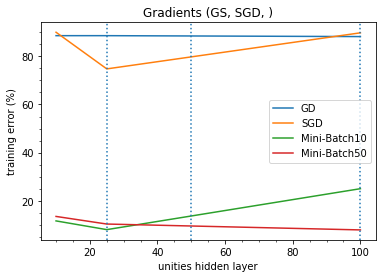

In [82]:
index = 3

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Gradients (GS, SGD, )")
plt.legend()
plt.show()

Text(0.5,1,'50 unities hidden layer')

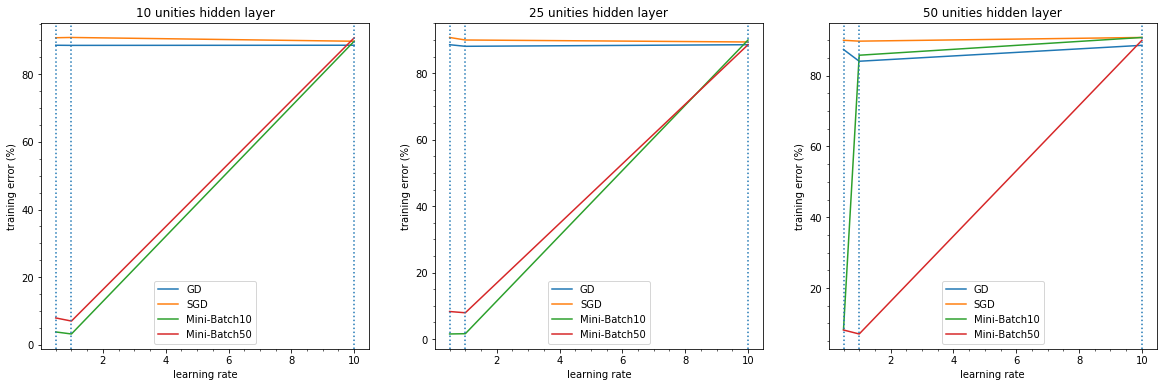

In [83]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
ax1.plot(inputsGD[0], outputsGD[0], label='GD')
ax1.plot(inputsSGD[0], outputsSGD[0], label='SGD')
ax1.plot(inputsMiniBatch10[0], outputsMiniBatch10[0], label='Mini-Batch10')
ax1.plot(inputsMiniBatch50[0], outputsMiniBatch50[0], label='Mini-Batch50')
ax1.axvline(x=0.5, ls='dotted')
ax1.axvline(x=1, ls='dotted')
ax1.axvline(x=10, ls='dotted')
ax1.minorticks_on()
ax1.legend()
ax1.set_xlabel('learning rate')
ax1.set_ylabel('training error (%)')
ax1.set_title('25 unities hidden layer')

ax2.plot(inputsGD[1], outputsGD[1], label='GD')
ax2.plot(inputsSGD[1], outputsSGD[1], label='SGD')
ax2.plot(inputsMiniBatch10[1], outputsMiniBatch10[1], label='Mini-Batch10')
ax2.plot(inputsMiniBatch50[1], outputsMiniBatch50[1], label='Mini-Batch50')
ax2.axvline(x=0.5, ls='dotted')
ax2.axvline(x=1, ls='dotted')
ax2.axvline(x=10, ls='dotted')
ax2.minorticks_on()
ax2.legend()
ax2.set_xlabel('learning rate')
ax2.set_ylabel('training error (%)')
ax2.set_title('50 unities hidden layer')

ax3.plot(inputsGD[2], outputsGD[2], label='GD')
ax3.plot(inputsSGD[2], outputsSGD[2], label='SGD')
ax3.plot(inputsMiniBatch10[2], outputsMiniBatch10[2], label='Mini-Batch10')
ax3.plot(inputsMiniBatch50[2], outputsMiniBatch50[2], label='Mini-Batch50')
ax3.axvline(x=0.5, ls='dotted')
ax3.axvline(x=1, ls='dotted')
ax3.axvline(x=10, ls='dotted')
ax3.minorticks_on()
ax3.legend()
ax3.set_xlabel('learning rate')
ax3.set_ylabel('training error (%)')
ax3.set_title('100 unities hidden layer')

# Testes Complementares

Apesar de não estar previsto no enunciado do TP, vamos variar alguns dos parâmetros:



Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 9s 2ms/step - loss: 1.7281 - acc: 0.3594 - val_loss: 0.8374 - val_acc: 0.6994
30.060000000000002
Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 8s 2ms/step - loss: 2.6264 - acc: 0.2448 - val_loss: 4.6667 - val_acc: 0.2378
76.22
Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 9s 2ms/step - loss: 14.4884 - acc: 0.0994 - val_loss: 14.5063 - val_acc: 0.1000
90.0


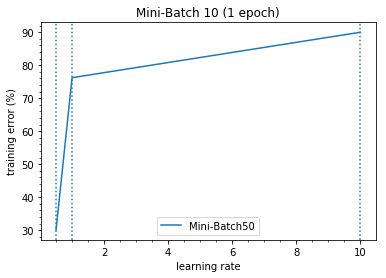

In [84]:
inputs = [0.5, 1, 10]
unities = [25, 50, 100]
outputs = []

for i, u in zip(inputs, unities):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(inputs, outputs, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Mini-Batch 10 (1 epoch)")
plt.legend()
plt.show()